In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

import datetime
d = datetime.datetime.today()
today = (f"{d.year}/{d.month}/{d.day}")

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 591


# Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude
Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}"

    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Build query URL
    query_url = f"{url}appid={weather_api_key}&units=metric&q={city}"

    # Get weather data
    city_response = requests.get(query_url)
    city_json = city_response.json()

   # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = city_json["weather"]

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_json["coord"]["lat"]
        city_lng = city_json["coord"]["lon"]
        city_max_temp = city_json["main"]["temp_max"]
        city_humidity = city_json["main"]["humidity"]
        city_clouds = city_json["main"]["humidity"]
        city_wind = city_json["clouds"]["all"]
        city_country = city_json["sys"]["country"]
        city_date = city_json["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | kailua-kona
Processing Record 2 of Set 1 | kailua-kona
Processing Record 3 of Set 1 | waitangi
Processing Record 4 of Set 1 | waitangi
Processing Record 5 of Set 1 | vila franca do campo
Processing Record 6 of Set 1 | vila franca do campo
Processing Record 7 of Set 1 | baukau
Processing Record 8 of Set 1 | baukau
Processing Record 9 of Set 1 | yayva
Processing Record 10 of Set 1 | yayva
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | papatowai
Processing Record 14 of Set 1 | papatowai
Processing Record 15 of Set 1 | saipan
Processing Record 16 of Set 1 | saipan
Processing Record 17 of Set 1 | letterkenny
Processing Record 18 of Set 1 | letterkenny
Processing Record 19 of Set 1 | 'ain abid
Processing Record 20 of Set 1 | 'ain abid
Processing Record 21 of Set 1 | ancud
Processing Record 22 of Set 1 | ancud
Processing Record 23 of Set 1 | edin

Processing Record 91 of Set 2 | turkmenbasy
Processing Record 92 of Set 2 | balabac
Processing Record 93 of Set 2 | balabac
Processing Record 94 of Set 2 | tiksi
Processing Record 95 of Set 2 | tiksi
Processing Record 96 of Set 2 | fuyu
Processing Record 97 of Set 2 | fuyu
Processing Record 98 of Set 2 | arona
Processing Record 99 of Set 2 | arona
Processing Record 0 of Set 3 | udachny
Processing Record 1 of Set 3 | udachny
Processing Record 2 of Set 3 | tokar
Processing Record 3 of Set 3 | tokar
Processing Record 4 of Set 3 | chonchi
Processing Record 5 of Set 3 | chonchi
Processing Record 6 of Set 3 | coquimbo
Processing Record 7 of Set 3 | coquimbo
Processing Record 8 of Set 3 | portland
Processing Record 9 of Set 3 | portland
Processing Record 10 of Set 3 | bethel
Processing Record 11 of Set 3 | bethel
Processing Record 12 of Set 3 | aral
Processing Record 13 of Set 3 | aral
Processing Record 14 of Set 3 | kuna
Processing Record 15 of Set 3 | kuna
Processing Record 16 of Set 3 | ni

Processing Record 87 of Set 4 | nagqu
Processing Record 88 of Set 4 | mtambile
Processing Record 89 of Set 4 | mtambile
Processing Record 90 of Set 4 | ulladulla
Processing Record 91 of Set 4 | ulladulla
Processing Record 92 of Set 4 | ma'rib
Processing Record 93 of Set 4 | ma'rib
Processing Record 94 of Set 4 | stanley
Processing Record 95 of Set 4 | stanley
Processing Record 96 of Set 4 | chake chake
Processing Record 97 of Set 4 | chake chake
Processing Record 98 of Set 4 | kaka
Processing Record 99 of Set 4 | kaka
Processing Record 0 of Set 5 | igarka
Processing Record 1 of Set 5 | igarka
Processing Record 2 of Set 5 | baki
Processing Record 3 of Set 5 | baki
Processing Record 4 of Set 5 | bontang
Processing Record 5 of Set 5 | bontang
Processing Record 6 of Set 5 | taoudenni
Processing Record 7 of Set 5 | taoudenni
Processing Record 8 of Set 5 | bad wurzach
Processing Record 9 of Set 5 | bad wurzach
Processing Record 10 of Set 5 | tadine
Processing Record 11 of Set 5 | tadine
Proc

Processing Record 83 of Set 6 | kirensk
Processing Record 84 of Set 6 | mount gambier
Processing Record 85 of Set 6 | mount gambier
Processing Record 86 of Set 6 | acarau
Processing Record 87 of Set 6 | acarau
Processing Record 88 of Set 6 | nova sintra
Processing Record 89 of Set 6 | nova sintra
Processing Record 90 of Set 6 | morehead city
Processing Record 91 of Set 6 | morehead city
Processing Record 92 of Set 6 | kidal
Processing Record 93 of Set 6 | kidal
Processing Record 94 of Set 6 | bethal
Processing Record 95 of Set 6 | bethal
Processing Record 96 of Set 6 | brasilia
Processing Record 97 of Set 6 | brasilia
Processing Record 98 of Set 6 | 'izbat al burj
Processing Record 99 of Set 6 | 'izbat al burj
City not found. Skipping...
Processing Record 0 of Set 7 | new iberia
Processing Record 1 of Set 7 | new iberia
Processing Record 2 of Set 7 | astara
Processing Record 3 of Set 7 | astara
Processing Record 4 of Set 7 | mundybash
Processing Record 5 of Set 7 | mundybash
Processing

Processing Record 75 of Set 8 | walvis bay
Processing Record 76 of Set 8 | bouna
Processing Record 77 of Set 8 | bouna
Processing Record 78 of Set 8 | gaalkacyo
Processing Record 79 of Set 8 | gaalkacyo
Processing Record 80 of Set 8 | amroli
Processing Record 81 of Set 8 | amroli
Processing Record 82 of Set 8 | barra do garcas
Processing Record 83 of Set 8 | barra do garcas
Processing Record 84 of Set 8 | ipameri
Processing Record 85 of Set 8 | ipameri
Processing Record 86 of Set 8 | shalqar
Processing Record 87 of Set 8 | shalqar
Processing Record 88 of Set 8 | bardai
Processing Record 89 of Set 8 | bardai
Processing Record 90 of Set 8 | valparaiso
Processing Record 91 of Set 8 | valparaiso
Processing Record 92 of Set 8 | yerofey pavlovich
Processing Record 93 of Set 8 | yerofey pavlovich
Processing Record 94 of Set 8 | nchelenge
Processing Record 95 of Set 8 | nchelenge
Processing Record 96 of Set 8 | kasangulu
Processing Record 97 of Set 8 | kasangulu
Processing Record 98 of Set 8 |

Processing Record 69 of Set 10 | laikit, laikit ii (dimembe)
Processing Record 70 of Set 10 | saldanha
Processing Record 71 of Set 10 | saldanha
Processing Record 72 of Set 10 | riohacha
Processing Record 73 of Set 10 | riohacha
Processing Record 74 of Set 10 | margate
Processing Record 75 of Set 10 | margate
Processing Record 76 of Set 10 | cat ba
Processing Record 77 of Set 10 | cat ba
City not found. Skipping...
Processing Record 78 of Set 10 | qala i naw
Processing Record 79 of Set 10 | qala i naw
Processing Record 80 of Set 10 | srivardhan
Processing Record 81 of Set 10 | srivardhan
Processing Record 82 of Set 10 | revda
Processing Record 83 of Set 10 | revda
Processing Record 84 of Set 10 | i-n-salah
Processing Record 85 of Set 10 | i-n-salah
Processing Record 86 of Set 10 | balykshi
Processing Record 87 of Set 10 | balykshi
Processing Record 88 of Set 10 | sumbe
Processing Record 89 of Set 10 | sumbe
Processing Record 90 of Set 10 | bojnurd
Processing Record 91 of Set 10 | bojnu

Processing Record 59 of Set 12 | aldinga beach
Processing Record 60 of Set 12 | yanchep
Processing Record 61 of Set 12 | yanchep
Processing Record 62 of Set 12 | najran
Processing Record 63 of Set 12 | najran
Processing Record 64 of Set 12 | saint-joseph
Processing Record 65 of Set 12 | saint-joseph
Processing Record 66 of Set 12 | inirida
Processing Record 67 of Set 12 | inirida
Processing Record 68 of Set 12 | siwa oasis
Processing Record 69 of Set 12 | siwa oasis
Processing Record 70 of Set 12 | mugia
Processing Record 71 of Set 12 | mugia
Processing Record 72 of Set 12 | charxin
Processing Record 73 of Set 12 | charxin
Processing Record 74 of Set 12 | taro
Processing Record 75 of Set 12 | taro
Processing Record 76 of Set 12 | nuevitas
Processing Record 77 of Set 12 | nuevitas
Processing Record 78 of Set 12 | aykhal
Processing Record 79 of Set 12 | aykhal
Processing Record 80 of Set 12 | las terrenas
Processing Record 81 of Set 12 | las terrenas
-----------------------------
Data Re

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df["Date"] = pd.to_datetime(city_data_df["Date"], unit = "s")
# Show Record Count
city_data_df.count()

City          567
Lat           567
Lng           567
Max Temp      567
Humidity      567
Cloudiness    567
Wind Speed    567
Country       567
Date          567
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kailua-kona,19.6406,-155.9956,26.98,80,80,100,US,2023-06-13 09:29:32
1,waitangi,-43.9535,-176.5597,9.90,91,91,95,NZ,2023-06-13 09:33:05
2,vila franca do campo,37.7167,-25.4333,19.23,96,96,93,PT,2023-06-13 09:33:05
3,baukau,51.5526,7.2042,27.38,37,37,5,DE,2023-06-13 09:33:06
4,yayva,59.3303,57.2641,21.40,38,38,34,RU,2023-06-13 09:33:06


In [10]:
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kailua-kona,19.6406,-155.9956,26.98,80,80,100,US,2023-06-13 09:29:32
1,waitangi,-43.9535,-176.5597,9.90,91,91,95,NZ,2023-06-13 09:33:05
2,vila franca do campo,37.7167,-25.4333,19.23,96,96,93,PT,2023-06-13 09:33:05
3,baukau,51.5526,7.2042,27.38,37,37,5,DE,2023-06-13 09:33:06
4,yayva,59.3303,57.2641,21.40,38,38,34,RU,2023-06-13 09:33:06


# Create the Scatter Plots Requested
Latitude Vs. Temperature

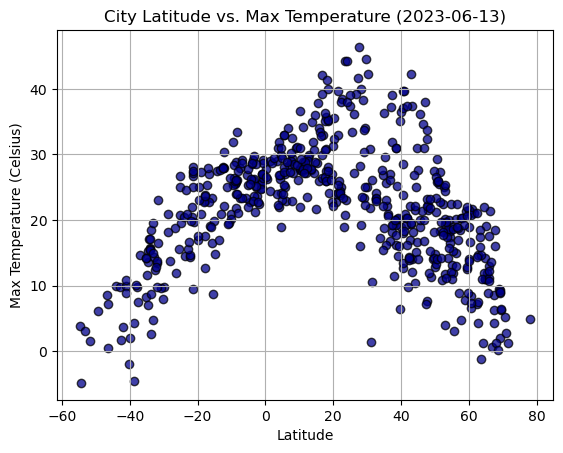

In [12]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", color="darkblue", edgecolors="black",
            alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%Y-%m-%d"))
plt.ylabel("Max Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

Latitude Vs. Humidity

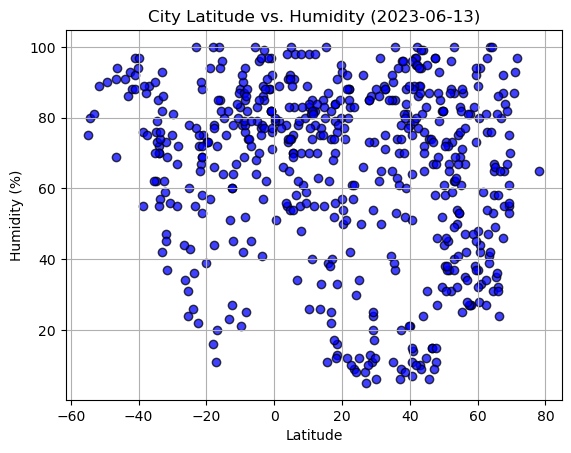

In [21]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", color="blue", edgecolors="black",
            alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%Y-%m-%d"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

Latitude Vs. Cloudiness

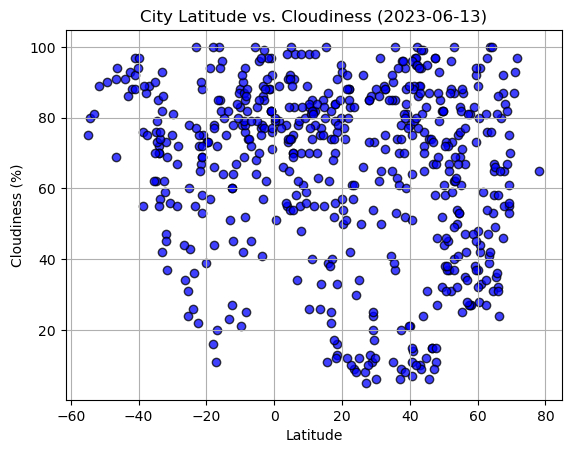

In [20]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", color="blue", edgecolors="black",
            alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%Y-%m-%d"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

Latitude vs. Wind Speed Plot

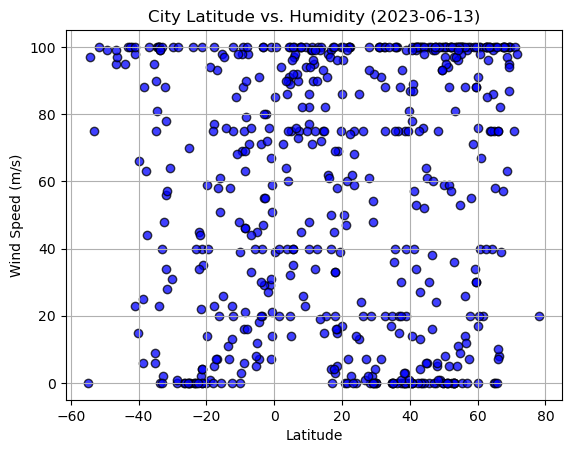

In [19]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", color="blue", edgecolors="black",
            alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%Y-%m-%d"))
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

# Requirement 2: Compute Linear Regression for Each Relationship

In [22]:
# Define a function to create Linear Regression plots
from scipy import stats

def create_linear_regression_plot(x_values, y_values, x_label, y_label):
    slope, intercept, rvalue, pvalue, stderr = stats.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_equation = f"y = {slope:.2f}x + {intercept:.2f}"
    
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.annotate(line_equation, (min(x_values), min(y_values)), fontsize=12, color="red")
    plt.grid()

In [23]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kailua-kona,19.6406,-155.9956,26.98,80,80,100,US,2023-06-13 09:29:32
2,vila franca do campo,37.7167,-25.4333,19.23,96,96,93,PT,2023-06-13 09:33:05
3,baukau,51.5526,7.2042,27.38,37,37,5,DE,2023-06-13 09:33:06
4,yayva,59.3303,57.2641,21.40,38,38,34,RU,2023-06-13 09:33:06
5,albany,42.6001,-73.9662,16.99,89,89,100,US,2023-06-13 09:33:06


In [24]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df= city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,waitangi,-43.9535,-176.5597,9.90,91,91,95,NZ,2023-06-13 09:33:05
6,papatowai,-46.5619,169.4708,8.53,91,91,95,NZ,2023-06-13 09:33:06
10,ancud,-41.8697,-73.8203,3.78,88,88,100,CL,2023-06-13 09:29:27
11,edinburgh of the seven seas,-37.0676,-12.3116,14.73,89,89,100,SH,2023-06-13 09:30:07
13,adamstown,-25.0660,-130.1015,20.73,60,60,70,PN,2023-06-13 09:33:08


# Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.6521653892305879


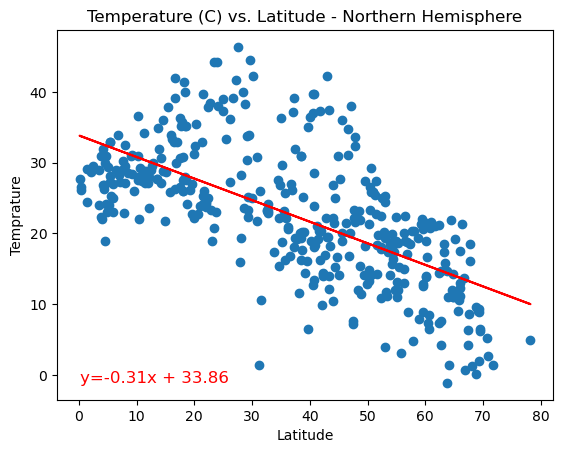

In [30]:
# Linear regression on Northern Hemisphere

# Extract latitude and temperature from the Northern Hemisphere DataFrame
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Perform linear regression
(slope,intercept,rvalue,pvalue,stderr)= stats.linregress(x_values, y_values)

# Calculate the regression line values
regress_values = slope * x_values + intercept
line_equation = f"y={slope :.2f}x + {intercept :.2f}"

# Plot the scatter plot and regression line
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, 'r-')
plt.xlabel("Latitude")
plt.ylabel("Temprature")
plt.title("Temperature (C) vs. Latitude - Northern Hemisphere")
plt.annotate(line_equation, (min(x_values), min(y_values)), fontsize=12, color="red")
print("The r-value is:", rvalue)

plt.show()

The r-value is: 0.8354786796909801


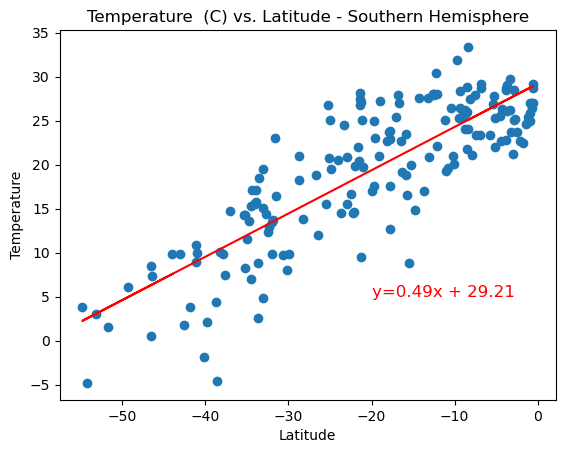

In [32]:
# Linear regression on Southern Hemisphere

# Extract latitude and temperature from the Northern Hemisphere DataFrame
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Perform linear regression
(slope,intercept,rvalue,pvalue,stderr)=stats.linregress(x_values, y_values)

# Calculate the regression line values
regress_values = slope * x_values + intercept
line_equation = f"y={slope :.2f}x + {intercept :.2f}"

# Plot the scatter plot and regression line
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title("Temperature  (C) vs. Latitude - Southern Hemisphere")
plt.annotate(line_equation, (-20,5), fontsize = 12, color = "red")
print("The r-value is:", rvalue)

plt.show()

Discussion about the linear relationship: 

1-In the Regression by Temperature (C) vs. Latitude - Northern Hemisphere, the coefficinet was -0.6521, which shows there exist inverse (moderate negative) relationship betweem both the variables (i-e. we can observe that the temperature seems to be declining as the latitude is increasing in the Northern Hemisphere, where there appears to be a negative link between latitude and maximum temperature.).The coefficient of -0.6521 shows moderate negative relationhsip and normal error variance.

2- In the Regression by Temperature  (C) vs. Latitude - Southern Hemisphere, the coefficinet was 0.8354, The slope is positive and upward slopping which shows there exist direct relationship betweem both the variables (i-e we can see that the temperature seems to be rising as the latitude is growing in the Southern Hemisphere). Further, the relationship is strong as it is closer to +1. Further, the graphs of regression also reveals the small error variance as the scatter dots are closer from to regression line.


# Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.10416925636854218


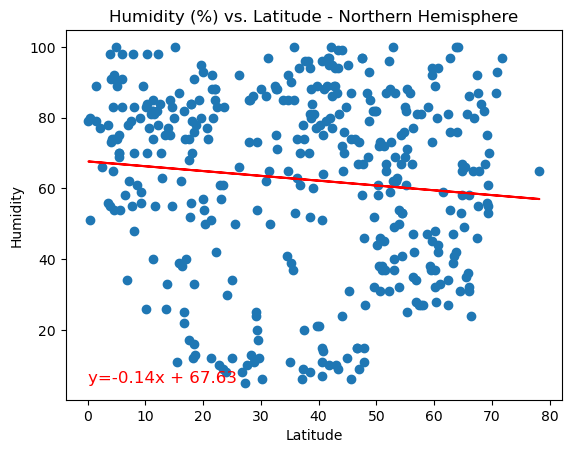

In [33]:
# Northern Hemisphere

# Extract latitude and Humidity from the Northern Hemisphere DataFrame
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Perform linear regression
(slope,intercept,rvalue,pvalue,stderr)= stats.linregress(x_values, y_values)

# Calculate the regression line values
regress_values = slope * x_values + intercept
line_equation = f"y={slope :.2f}x + {intercept :.2f}"

# Plot the scatter plot and regression line
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, 'r-')
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Humidity (%) vs. Latitude - Northern Hemisphere")
plt.annotate(line_equation,(min(x_values), min(y_values)), fontsize=12, color="red")
print("The r-value is:", rvalue)

plt.show()

The r-value is: 0.005275296355922646


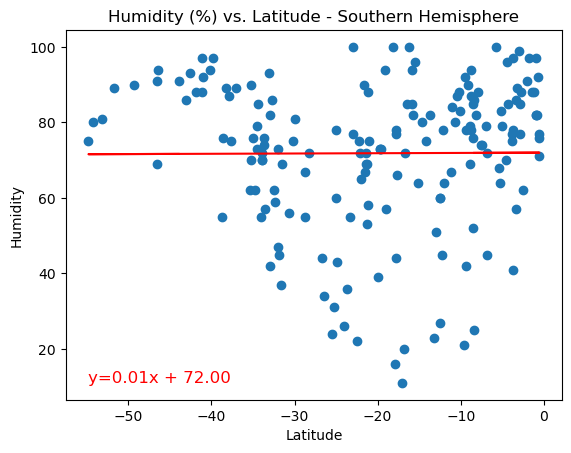

In [34]:
# Southern Hemisphere

# Extract latitude and Humidity from the Southern Hemisphere DataFrame
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Perform linear regression
(slope,intercept,rvalue,pvalue,stderr)= stats.linregress(x_values, y_values)

# Calculate the regression line values
regress_values = slope * x_values + intercept
line_equation = f"y={slope :.2f}x + {intercept :.2f}"

# Plot the scatter plot and regression line
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, 'r-')
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Humidity (%) vs. Latitude - Southern Hemisphere")
plt.annotate(line_equation, (min(x_values), min(y_values)), fontsize=12, color="red")
print("The r-value is:", rvalue)

plt.show()

#Discussion about the linear relationship: 

1- As the coefficient is -0.1041 for the linear relationship between humidity and latitude in the Northern Hemisphere. which shows weak negative relationship between variables.Indicating a slight decrease in humidity as latitude increases.

2-As in for the Southern Hemisphere, the linear relationship between humidity and latitude has coefficient of 0.00527, suggesting a very weak positive relationship between humidity and latitude.

3- Thus the conclusion is that the linear regression results indicate a weak correlation between humidity and latitude in both the Northern Hemisphere and the Southern Hemisphere. 

# Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.10416925636854218


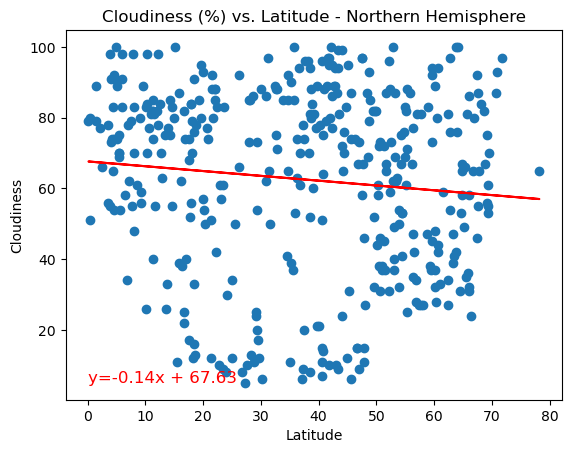

In [36]:
# Northern Hemisphere

# Extract latitude and Cloudiness from the Northern Hemisphere DataFrame
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Perform linear regression
(slope,intercept,rvalue,pvalue,stderr)= stats.linregress(x_values, y_values)

# Calculate the regression line values
regress_values = slope * x_values + intercept
line_equation = f"y={slope :.2f}x + {intercept :.2f}"

# Plot the scatter plot and regression line
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, 'r-')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Cloudiness (%) vs. Latitude - Northern Hemisphere")
plt.annotate(line_equation,(min(x_values), min(y_values)), fontsize=12, color="red")
print("The r-value is:", rvalue)

plt.show()

The r-value is: 0.005275296355922646


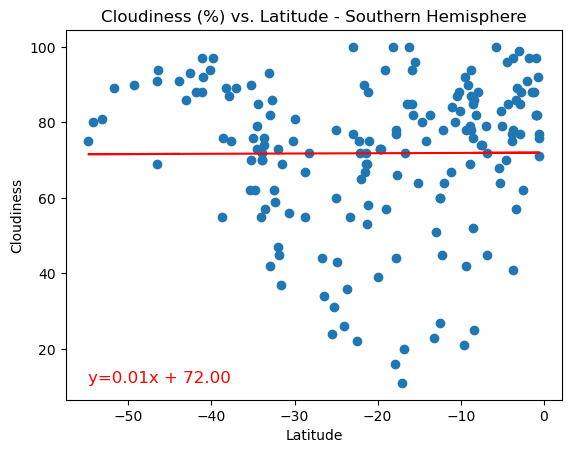

In [37]:
# Southern Hemisphere

# Extract latitude and Cloudiness from the Southern Hemisphere DataFrame
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Perform linear regression
(slope,intercept,rvalue,pvalue,stderr)= stats.linregress(x_values, y_values)

# Calculate the regression line values
regress_values = slope * x_values + intercept
line_equation = f"y={slope :.2f}x + {intercept :.2f}"

# Plot the scatter plot and regression line
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, 'r-')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Cloudiness (%) vs. Latitude - Southern Hemisphere")
plt.annotate(line_equation, (min(x_values), min(y_values)), fontsize=12, color="red")
print("The r-value is:", rvalue)

plt.show()

#Discussion about the linear relationship: 

1- As the coefficient is -0.10416 for the linear relationship between cloudiness and latitude in the Northern Hemisphere. which shows weak negative relationship between variables.Indicating as as latitude increases, the cloudiness in northern hemisphere decreases.

2-As in for the Southern Hemisphere, the linear relationship between cloudiness and latitude has coefficient of 0.00527, suggesting a very weak positive relationship between cloudiness and latitude.

3- Thus the conclusion is that the linear regression results indicate a weak correlation between cloudiness and latitude in both the Northern Hemisphere and the Southern Hemisphere. 

# Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.007913661406419258


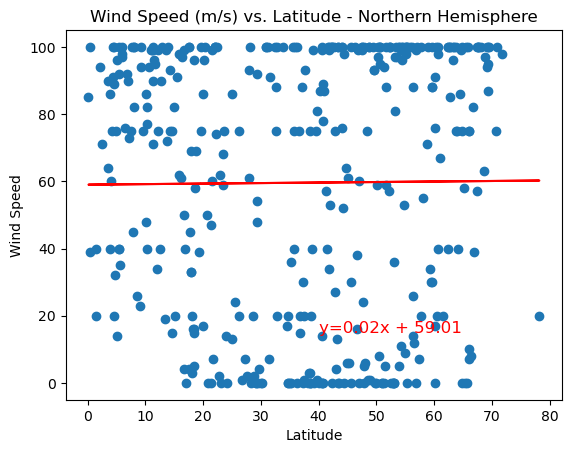

In [38]:
# Northern Hemisphere

# Extract latitude and Wind Speed from the Northern Hemisphere DataFrame
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Perform linear regression
(slope,intercept,rvalue,pvalue,stderr)= stats.linregress(x_values, y_values)

# Calculate the regression line values
regress_values = slope * x_values + intercept
line_equation = f"y={slope :.2f}x + {intercept :.2f}"

# Plot the scatter plot and regression line
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, 'r-')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Wind Speed (m/s) vs. Latitude - Northern Hemisphere")
plt.annotate(line_equation, (40,15), fontsize=12, color="red")
print("The r-value is:", rvalue)

plt.show()

The r-value is: -0.17664927307521378


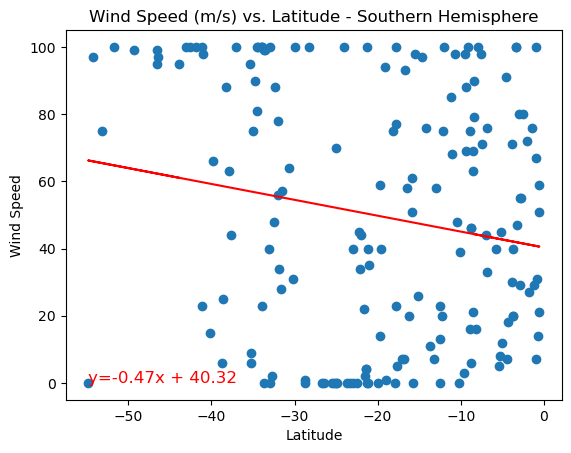

In [39]:
# Southern Hemisphere

# Extract latitude and Wind Speed from the Southern Hemisphere DataFrame
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Perform linear regression
(slope,intercept,rvalue,pvalue,stderr)= stats.linregress(x_values, y_values)

# Calculate the regression line values
regress_values = slope * x_values + intercept
line_equation = f"y={slope :.2f}x + {intercept :.2f}"

# Plot the scatter plot and regression line
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, 'r-')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Wind Speed (m/s) vs. Latitude - Southern Hemisphere")
plt.annotate(line_equation, (min(x_values), min(y_values)), fontsize=12, color="red")
print("The r-value is:", rvalue)

plt.show()

#Discussion about the linear relationship: 

1- As the coefficient is 0.00791 for the linear relationship between windspeed and latitude in the Northern Hemisphere. which shows weak positive relationship between variables.Indicating a slight increase in windspeed as latitude increases.

2-As in for the Southern Hemisphere, the linear relationship between windspeed and latitude has coefficient of -0.1766, suggesting a weak negative relationship between windspeed and latitude. In the southern hemisphere as the latitude increases, the windspeed decreases.

3- Thus the conclusion is that the linear regression results indicate a weak correlation between windspeed and latitude in both the Northern Hemisphere and the Southern Hemisphere.